## 5: Classification - Part 1

Eva Dyer, BMED 6517

___

#### 1. Overview of classification

**(1) What is a classifier?** A classifier is a function (or model) that learns a mapping of our inputs onto a discrete output space. In simple terms, it is an algorithm that allows us to take in some data as input and decides which "class" or group the data belong to.

You will see that, in many cases, classification has similar objectives as regression, i.e. it is a supervised learning problem that aims to learn a mapping function bewteen two domains by minimizing a loss/cost function. However, instead of mapping outputs onto continuous values in $\mathbb{R}$, we instead divide the space into $n$ discrete <b>classes</b>.
<p>



*Example of an image classification task (CIFAR-10)*

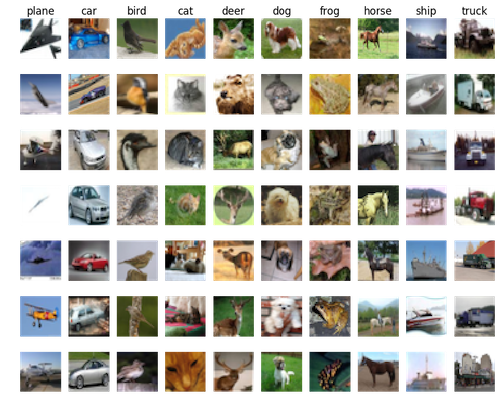



Example images from the CIFAR-10 dataset

*Examples of different types of classification problems in medical imaging applications*

*   Image classification:  Determine the class of the entire image (cat, dog)
*   Semantic segmentation:  Label each pixel in the image as being from one discrete class (tumor vs. tissue)
*   Object detection:  Find an object of interest in an image


img-01-dkfz-ai.jpeg


*Examples of a cell type classification problem involving different modalities and levels of granularity.*

fx1.jpeg

**(2) Decision boundary:** One of the most common ways to think about classifying two (or more) groups of data is to draw a "line" between the two classes (or clusters) of data points. In a high-dimensional space, the same idea applies. Only now instead of defining a line, we can define a hyperplane that divides our two classes. This hyperplane is called our _decision boundary_.

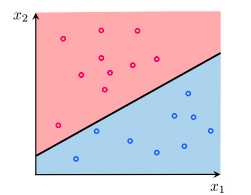

**(3) Probabilistic interpretation:** Another way to think of
our objective is that we want to learn a function that estimates the probability of a point belonging to a particular class, given its features. In this case, the classes can be established by setting probability cutoffs.

In other words, our goal is to learn a function which estimates the probability of a specific label $\widehat{y}_i$ given our data ($X$). This means we need to estimate $$ Pr [ Y = y_i | X = x_i ].$$

#### 2. Types of classification problems


**(1) Linearly Separable vs. Not Linearly Separable**: A problem where it is possible to exactly separate the classes with a straight line (or plane) in the feature space. (See the example above!)



linearly_separable.png



**(2) Binary vs. Multi-class**: A binary classification problem has only 2 classes, while a multi-class problem has more than 2 classes. There are two approaches to dealing with multi-class problems:

- Convert multi-class problems to binary problems using a series of "one vs. the rest" binary classifiers

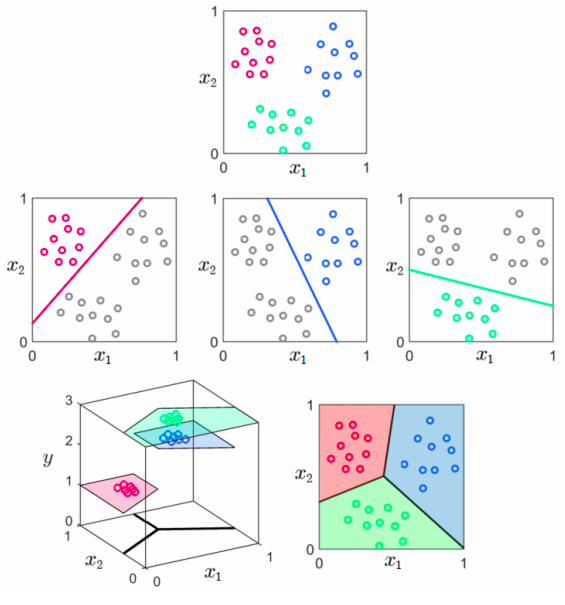<center>




- Consider the multi-class nature of the problem when deriving the method (e.g. kNN, multinomial loss)

**(3) Types of classifiers:**
There are several ways to do classification, and different classification models fall into different categories. Often, you'll find that classifiers are described as:
<ul>
    <li><b>Generative or Discriminative:</b> Models that explicitly compute the probability density function of the data first, and then estimate the probability that they belong to class A, B, C... given your inputs <b>v/s</b>  Models that directly estimate the probability that given certain inputs, your data belong to class A, B, C...
   

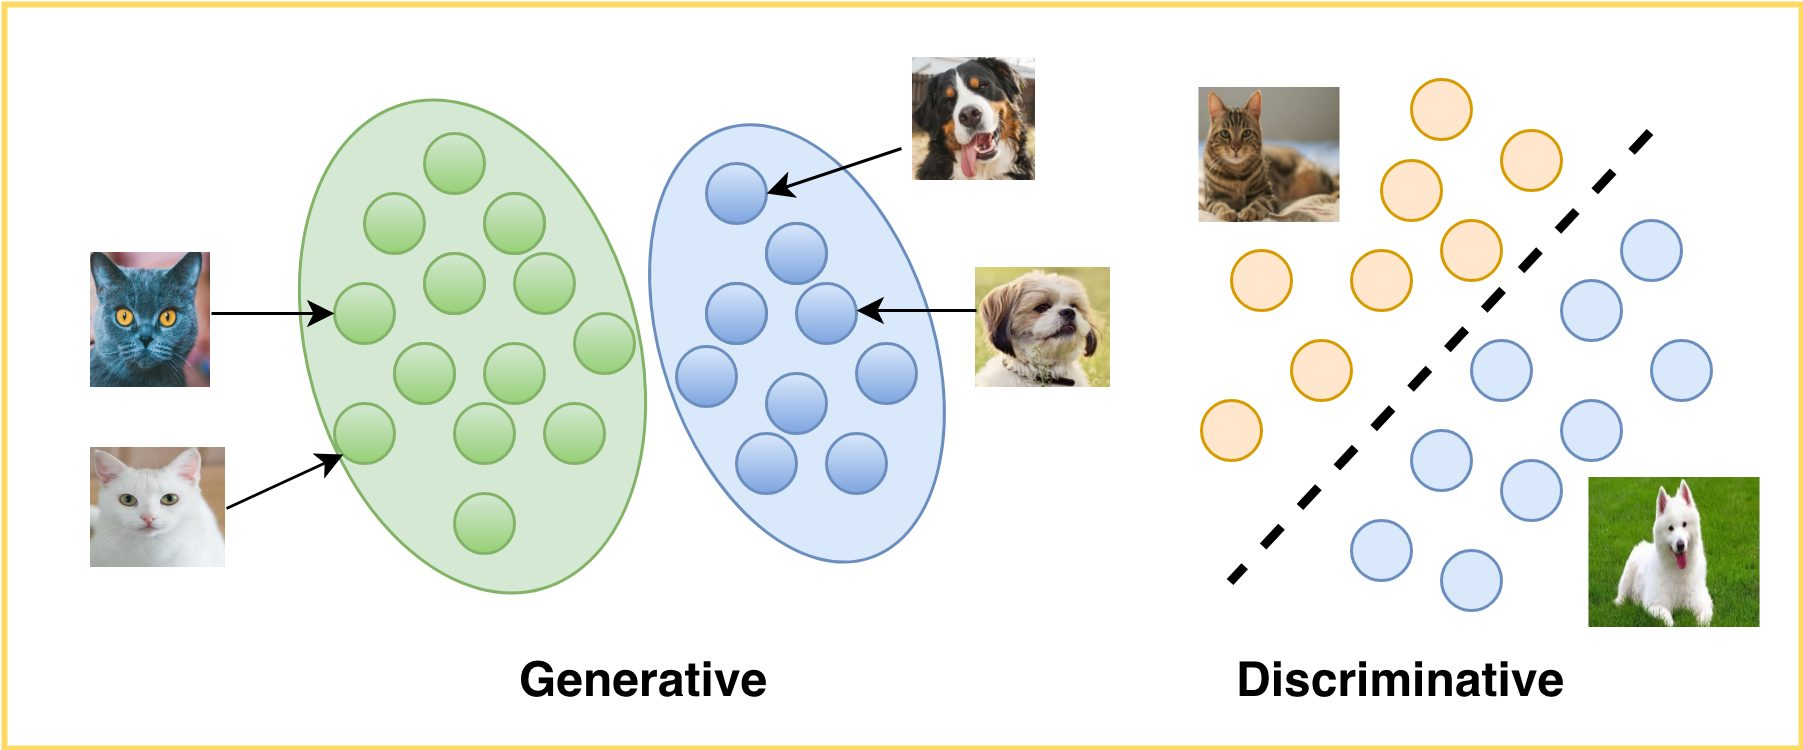

Image From: https://learnopencv.com/generative-and-discriminative-models/

<ul>
<li><b>Linear or Non-linear:</b> Models that draw linear decision boundaries in the feature space to classify data into different classes <b>v/s</b> those that draw non-linear decision boundaries to classify data into different classes</li>
</ul>

  <ul>
  <li><b>Parametric or Non-parametric:</b> Models where the complexity of the model is fixed and is not a function of the amount of training data (assume a known distribution) <b>v/s</b> those where the complexity of the model is a function of and changes with the amount of training data (no distributional assumptions).</li>
  </ul>

#### 3. Error and Accuracy Metrics

The metrics designed for classification revolve around four rather self-explanatory quantites. They are:
<ol>
    <li><b>True Positives (TP):</b> Data belonging to the class 1 that are predicted correctly as belonging to class 1.</li>
    <li><b>True Negatives (TN):</b> Data belonging to the class 0 that are predicted correctly as belonging to class 0.</li>
    <li><b>False Positives (FP):</b> Data belonging to the class 0 that are incorrectly predicted as belonging to class 1. These are also known as "Type 1" errors.</li>
    <li><b>False Negatives (FN):</b> Data belonging to the class 1 that are incorrectly predicted as belonging to class 0. These are also known as "Type 2" errors.</li>
</ol>

These four quantities can then be combined in different ways to give us measures that often shed light on different aspects of our classifier's performance.

##### 3.1. Accuracy metrics
* Accuracy = (number correct)/(total) = (TP + TN)/(TP + TN + FP + FN)

This is probably the most intuitive measure of performance, since it is just the ratio of the number of correct predictions to the total number of predictions made.

##### 3.2. Precision and Recall
* Precision (P) (Specificity) = TP/(TP + FP)

* Recall (R) (Sensitivity) = TP/(TP + FN)

* $f_1$ score = 2PR/(P+R)

The <u>precision</u> of a classifier is how precise it is, i.e. it penalizes the classifier for false positives but not false negatives.

The <u>recall</u> is the complement of the precision - It sees how well a classifier can recall or remember instances from a particular class, thus penalizing false negatives, but not false positives.

The <u>$f_1$ score</u> is a way of striking a balance between the precision and recall metrics. If you look at the formula closely you will realize that it is simply their harmonic mean!

##### 3.3. Confusion Matrix

False positives and false negatives in themselves give very limited information when the problem isn't binary. The "confusion matrix" is a multi-class generalization of the concept, and can help identify which classes are "confusing" the algorithm. Here's an example:

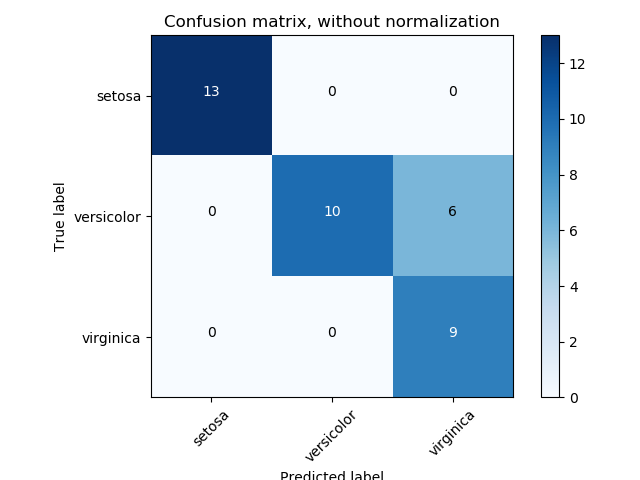

##### 3.4. ROC curves

The "receiver operating characteristic", or ROC curve, is useful for models where a threshold is used. The area under the curve can be used as a metric for how well the model performs.


ROC_curve.jpg

#### 4. Class Imbalance

A balanced problem has roughly equal numbers of examples in all classes, while an imbalanced problem has an (typically significantly) higher number of examples of some classes. There are a few basic strategies to overcome class imbalance:

- <i>Change the cost function</i>: Re-balancing the cost function to penalize mis-classification of the under-represented class more.

- <i>Subsampling</i>: discard information from over-represented class. This is inefficient since not all data is used.

- <i>Oversampling</i>: add repeats of the under-represented class (very similar to re-balancing the cost function). This can lead to over-fitting of the decision boundary to the few examples of the under-represented class.

- <i>Resampling</i>: Re-sample from the under-represented class, but add some noise. This is a robust solution, but requires some knowledge of the distribution of the under-represented data (e.g. generative models).



#### 5. Logistic Regression

To start on our Classification journey, let's talk about <b>Logistic Regression</b>, one of the most straight-forward extensions of linear regression to the classification setting.
</center>

##### 5.1. Going from regression to classification through a link function

Now let's start deriving the logistic regression classifier in the context of what we've seen before for linear regression.

Recall that the loss function for linear least-squares regression is:
$$ \min_{\beta}~~ \| {\bf y} - {\bf X}\beta \|_2^2 $$

<p>
Now, in regression our goal was to find a set of coefficients $\beta$ that minimize the least-squares error between our input data ${\bf y}$ and reconstruction of data in terms of the feature matrix ${\bf X} \in \mathbb{R}^{N \times d}$. Let ${\bf X}_{(i)}$ denote the $i^{\rm th}$ row of the feature matrix $\bf X$, which corresponds to the features (coordinates) of the $i^{\rm th}$ point.


In the classification setting, we need to map our predictions to discrete labels. Hence, the regression model doesn't quite do the trick. We need a slightly different strategy to go from continuous features to discrete outputs. We do this by introducing an additional "link" function which maps our outputs to discrete labels (e.g., 0 and 1).

<b>Link functions:</b> Some examples of link functions that map values from $\mathbb{R}$ onto other domains are:

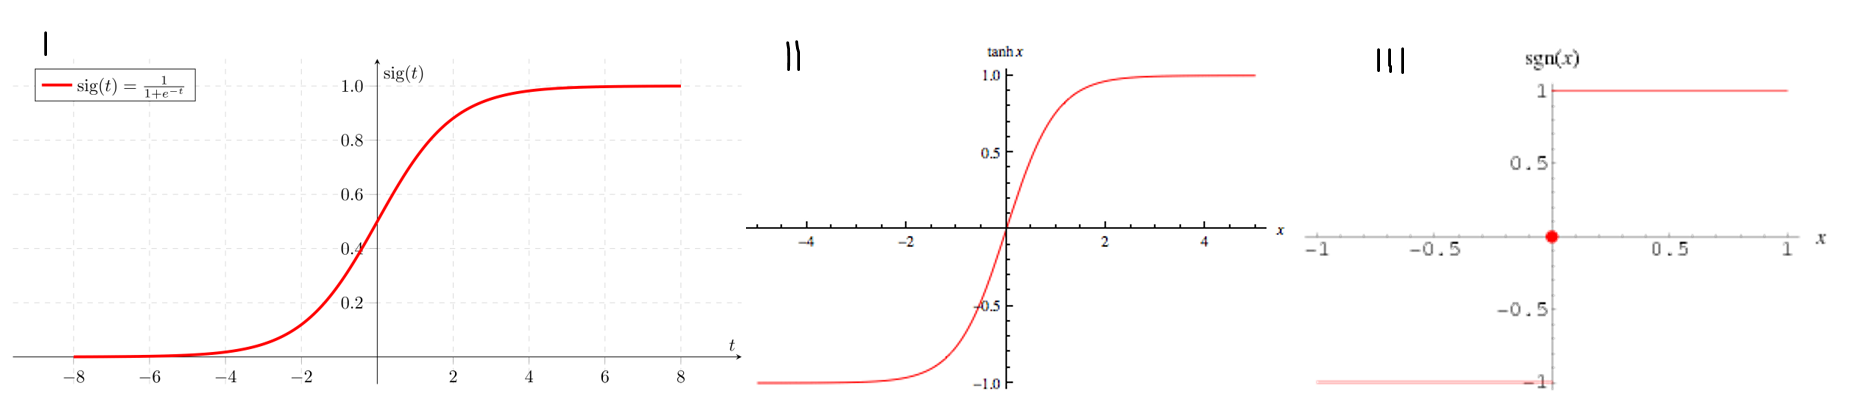

<li>The <b>logit</b> (also sigmoid, logistic) funtion $(\mathbb{R} \rightarrow (0,1)) :g(t) = \frac{1}{1 + e^{-t}}$</li><br>
    <li>The <b>hyperbolic tangent (tanh)</b> funtion $(\mathbb{R} \rightarrow (-1,1)) :g(t) = tanh(t)$</li><br>
    <li>The <b>sign (sgn)</b> function $(\mathbb{R} \rightarrow \{-1,1\}) :g(t) = sign(t)$</li>

The output of the logit function can be interpreted as probabilities, where the output prediction or score is given by:

$$ s_i = g({\bf X}_{(i)}\beta ).$$

In this case, we can decide whether or not a data point belongs to class 0 or 1 by checking to see if
$$g({\bf X}_{(i)}\beta )  \lessgtr p.$$ If it is less than some threshold $p$, we will predict that the data point is from class 1. Otherwise, we will predict that its from class 0.

Where $x_i$ are the inputs or features for every $i^{th}$ data point, and $y_i$ are the corresponding outputs or labels. In general, we can simplify this problem and say that $p=0.5$ and threshold our predictions accordingly.

**Questions:**

> (1) Which $g$'s are "good" functions to use for our purposes? What properties do we desire for a "good" $g$? What might complicate our problem when trying to solve for $\beta$?

> (2) What "kind" of a classification approach does logistic regression employ? Select the appropriate option from each of the three classes mentioned above, i.e. generative or discriminative, linear or non-linear, parametric or non-parametric.

##### 5.2. Applying logistic regression to data in Python

We will now apply logistic regression to a few datasets to get a better sense of how exactly things work

1. Generate a synthetic dataset (blobs)

In [1]:
## required imports
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## generate a clean toy dataset (blobs)
n_samples=100
X, y = make_blobs(n_samples=n_samples, centers=2, cluster_std=1, n_features=2, random_state=22)

2. Scikit Learn's logistic regression model

In [2]:
## import logistic regression model
from sklearn.linear_model import LogisticRegression

## initialize and fit a logistic regression model to the data
clf_lr = LogisticRegression(random_state=22,fit_intercept=True)
clf_lr.fit(X,y)

## save the coefficients and the intercept of the model
coefs = clf_lr.coef_
intercept = clf_lr.intercept_

3. Compute scores

In [3]:
## compute the scores of the data
scores = X[:,0]*coefs[:,0] + X[:,1]*coefs[:,1] + intercept
scores_0 = scores[y==0]
scores_1 = scores[y==1]

## compute the probability of the data belonging to class 1
data_tx = 1/(1+np.exp(-1*(scores)))
data_tx_0 = data_tx[y==0]
data_tx_1 = data_tx[y==1]


4. Plot data and decision boundaries

In [4]:
## plot out the original data, the data's scores, probabilities and decision boundary
f = plt.figure(1,figsize=(12,4))

plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Original Data')

plt.subplot(132)
plt.plot(scores_0,'o',c='gold',label='class 0')
plt.plot(scores_1,'o',c='purple',label='class 1')
plt.title('Linearly transformed data')
plt.legend()

plt.subplot(133)
plt.plot(data_tx_0,'o',c='gold',label='class 0')
plt.plot(data_tx_1,'o',c='purple',label='class 1')
plt.title('Scores')
plt.legend()
plt.show()

In [5]:
# ROC curve

from sklearn.metrics import roc_curve, auc, classification_report
y_pred = clf_lr.predict(X)

fpr, tpr, _ = roc_curve(y_pred, y)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

5. Generate a noisier dataset and train the model again

In [6]:
## generate a noisy toy dataset (blobs)
n_samples=100
X_noisy, y_noisy = make_blobs(n_samples=n_samples, centers=2, cluster_std=5, n_features=2, random_state=22)

## initialize and fit a logistic regression model to the data
clf_lr_noisy = LogisticRegression(random_state=22,fit_intercept=True)
clf_lr_noisy.fit(X_noisy,y_noisy)

## save the coefficients and the intercept of the model
coefs_noisy = clf_lr_noisy.coef_
intercept_noisy = clf_lr_noisy.intercept_

## compute the scores of the data
scores_noisy = X_noisy[:,0]*coefs_noisy[:,0] + X_noisy[:,1]*coefs_noisy[:,1] + intercept_noisy
scores_noisy_0 = scores_noisy[y_noisy==0]
scores_noisy_1 = scores_noisy[y_noisy==1]

## compute the probability of the data belonging to class 1
data_noisy_tx = 1/(1+np.exp(-1*(scores_noisy)))
data_noisy_tx_0 = data_noisy_tx[y==0]
data_noisy_tx_1 = data_noisy_tx[y==1]


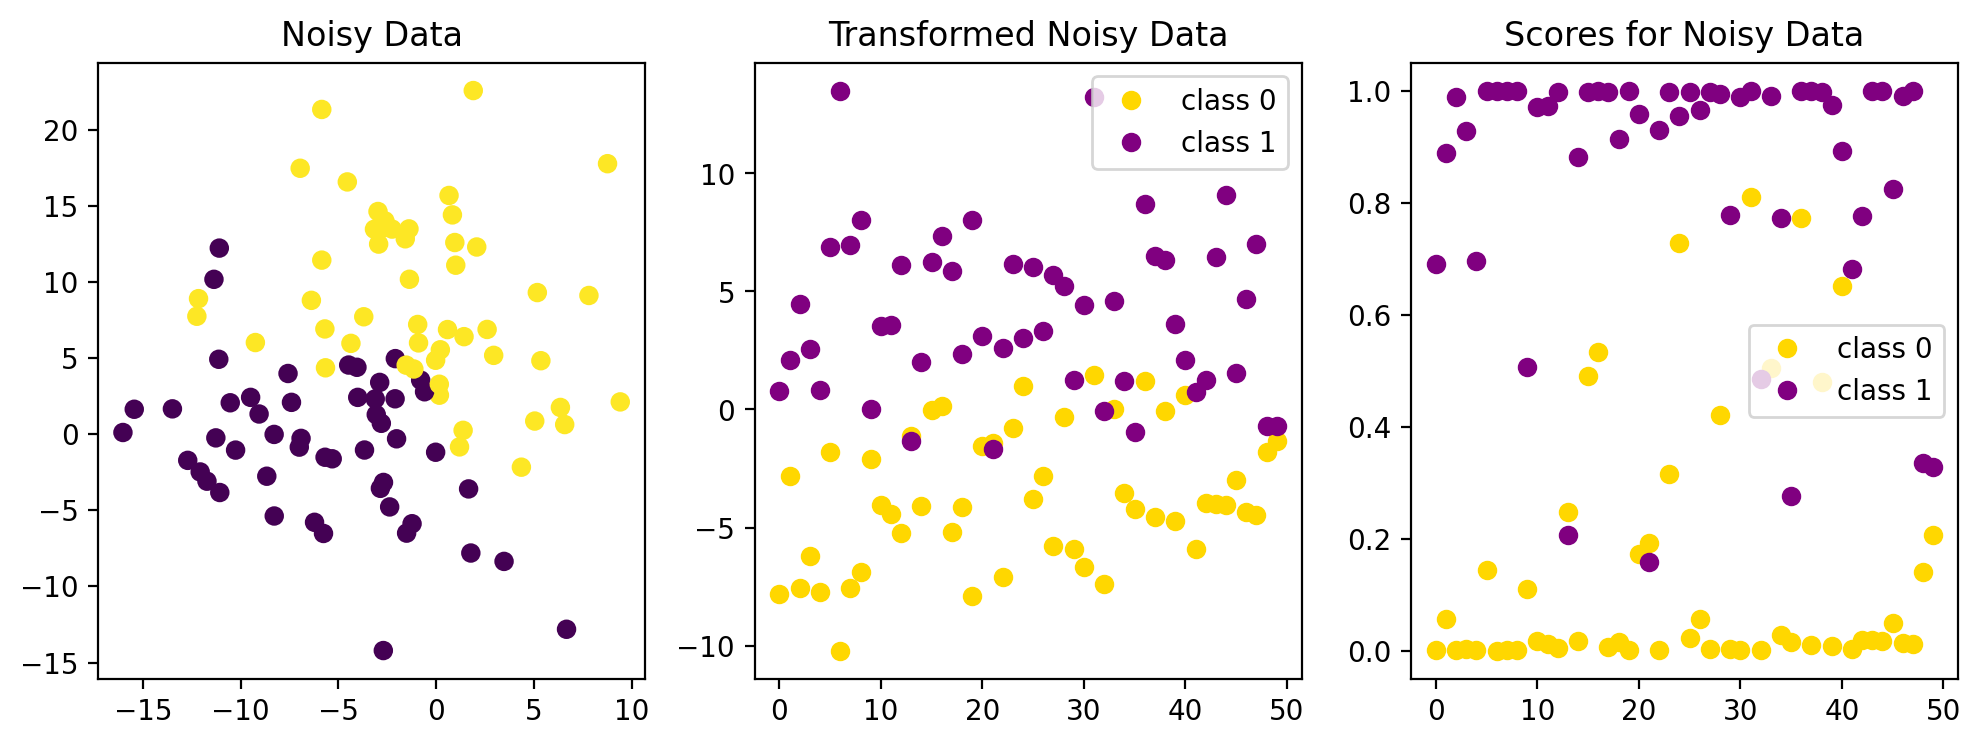

In [7]:
## plot out the original data, the data's scores, probabilities and decision boundary
f = plt.figure(1,figsize=(12,4))

plt.subplot(131)
plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y_noisy)
plt.title('Noisy Data')

plt.subplot(132)
plt.plot(scores_noisy_0,'o',c='gold',label='class 0')
plt.plot(scores_noisy_1,'o',c='purple',label='class 1')
plt.title('Transformed Noisy Data')
plt.legend()

plt.subplot(133)
plt.plot(data_noisy_tx_0,'o',c='gold',label='class 0')
plt.plot(data_noisy_tx_1,'o',c='purple',label='class 1')
plt.title('Scores for Noisy Data')
plt.legend()
plt.show()

In [8]:
# ROC curve
y_pred = clf_lr_noisy.predict(X_noisy)
fpr, tpr, _ = roc_curve(y_pred, y_noisy)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

#### 6. Application to a biomedical dataset

We will now apply Logistic Regression to a biomedical dataset!

We will use the **“Breast Cancer Wisconsin (Diagnostic)” (WBCD)** dataset -- which provides 30 characteristics of cells obtained from a minimally invasive fine needle aspirate (FNA). The goal is to discriminate benign from malignant lumps of a breast mass, with machine learning.

Below is the example image of a malignant breast FNA. (Figure from Mangasarian, O.L., et al, 1995. Operations Research, 43(4), pp.570-577.)

Using an image analysis software with cell boundary detection algorithm, 30 features are extracted.

In detail, 10 real-valued features are computed for each cell nucleus, and their (the features') mean value, standard error, and the mean of the three extreme (largest or worst) values are computed for each image as the features of each sample.

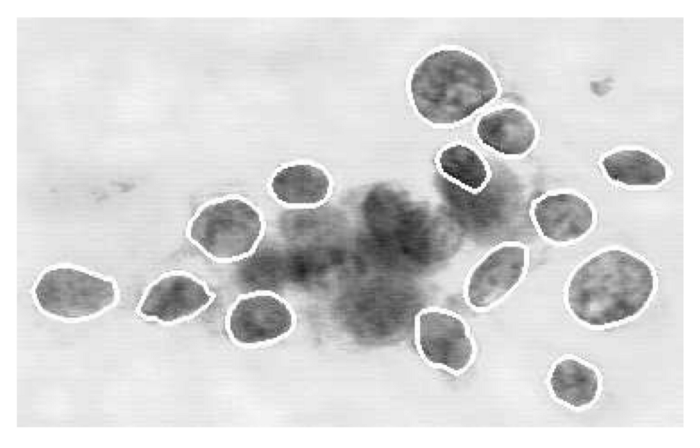

The features are:
- **Radius**: the mean value of distances from center to points on the perimeter;
- **Texture**: the standard deviation of gray-scale values;
- **Perimeter**: directly provided by the boundary detection algorithm;
- **Area**: directly provided by the boundary detection algorithm;
- **Smoothness**: local variation in radius lengths;
- **Compactness**: perimeter^2 / area;
- **Concavity**: severity of concave portions of the contour;
- **Concave points**: number of concave portions of the contour;
- **Symmetry**
- **Fractal Dimension**

We will now try to use classify cells with logistic regression!

##### 6.1 Understand your dataset

In [9]:
## Import data and libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

data, target = load_breast_cancer(return_X_y=True)
print("data shape is {}; target shape is {}.".format(data.shape, target.shape))

data_df = pd.DataFrame(data)

data shape is (569, 30); target shape is (569,).


In [10]:
data_df.head(10)

0      1       2       3        4        5        6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
5  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
6  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270  0.07400  0.1794   
7  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.05985  0.2196   
8  13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590  0.09353  0.2350   
9  12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730  0.08543  0.2030   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
5  0.07613  ...  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355  0.1741   
6  0.05742  ...  22.88  27.66  153.20  1606.0  0.1442  0.2576  0.3784  0.1932   
7  0.07451  ...  17.06  28.14  110.60   897.0  0.1654  0.3682  0.2678  0.1556   
8  0.07389  ...  15.49  30.73  106.20   739.3  0.1703  0.5401  0.5390  0.2060   
9  0.08243  ...  15.09  40.68   97.65   711.4  0.1853  1.0580  1.1050  0.2210   

       28       29  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  
5  0.3985  0.12440  
6  0.3063  0.08368  
7  0.3196  0.11510  
8  0.4378  0.10720  
9  0.4366  0.20750  

[10 rows x 30 columns]

In [11]:
data_df.describe()

0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9   ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   
25%      0.064920    0.029560    0.020310    0.161900    0.057700  ...   
50%      0.092630    0.061540    0.033500    0.179200    0.061540  ...   
75%      0.130400    0.130700    0.074000    0.195700    0.066120  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               20          21          22           23          24  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               25          26          27          28          29  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

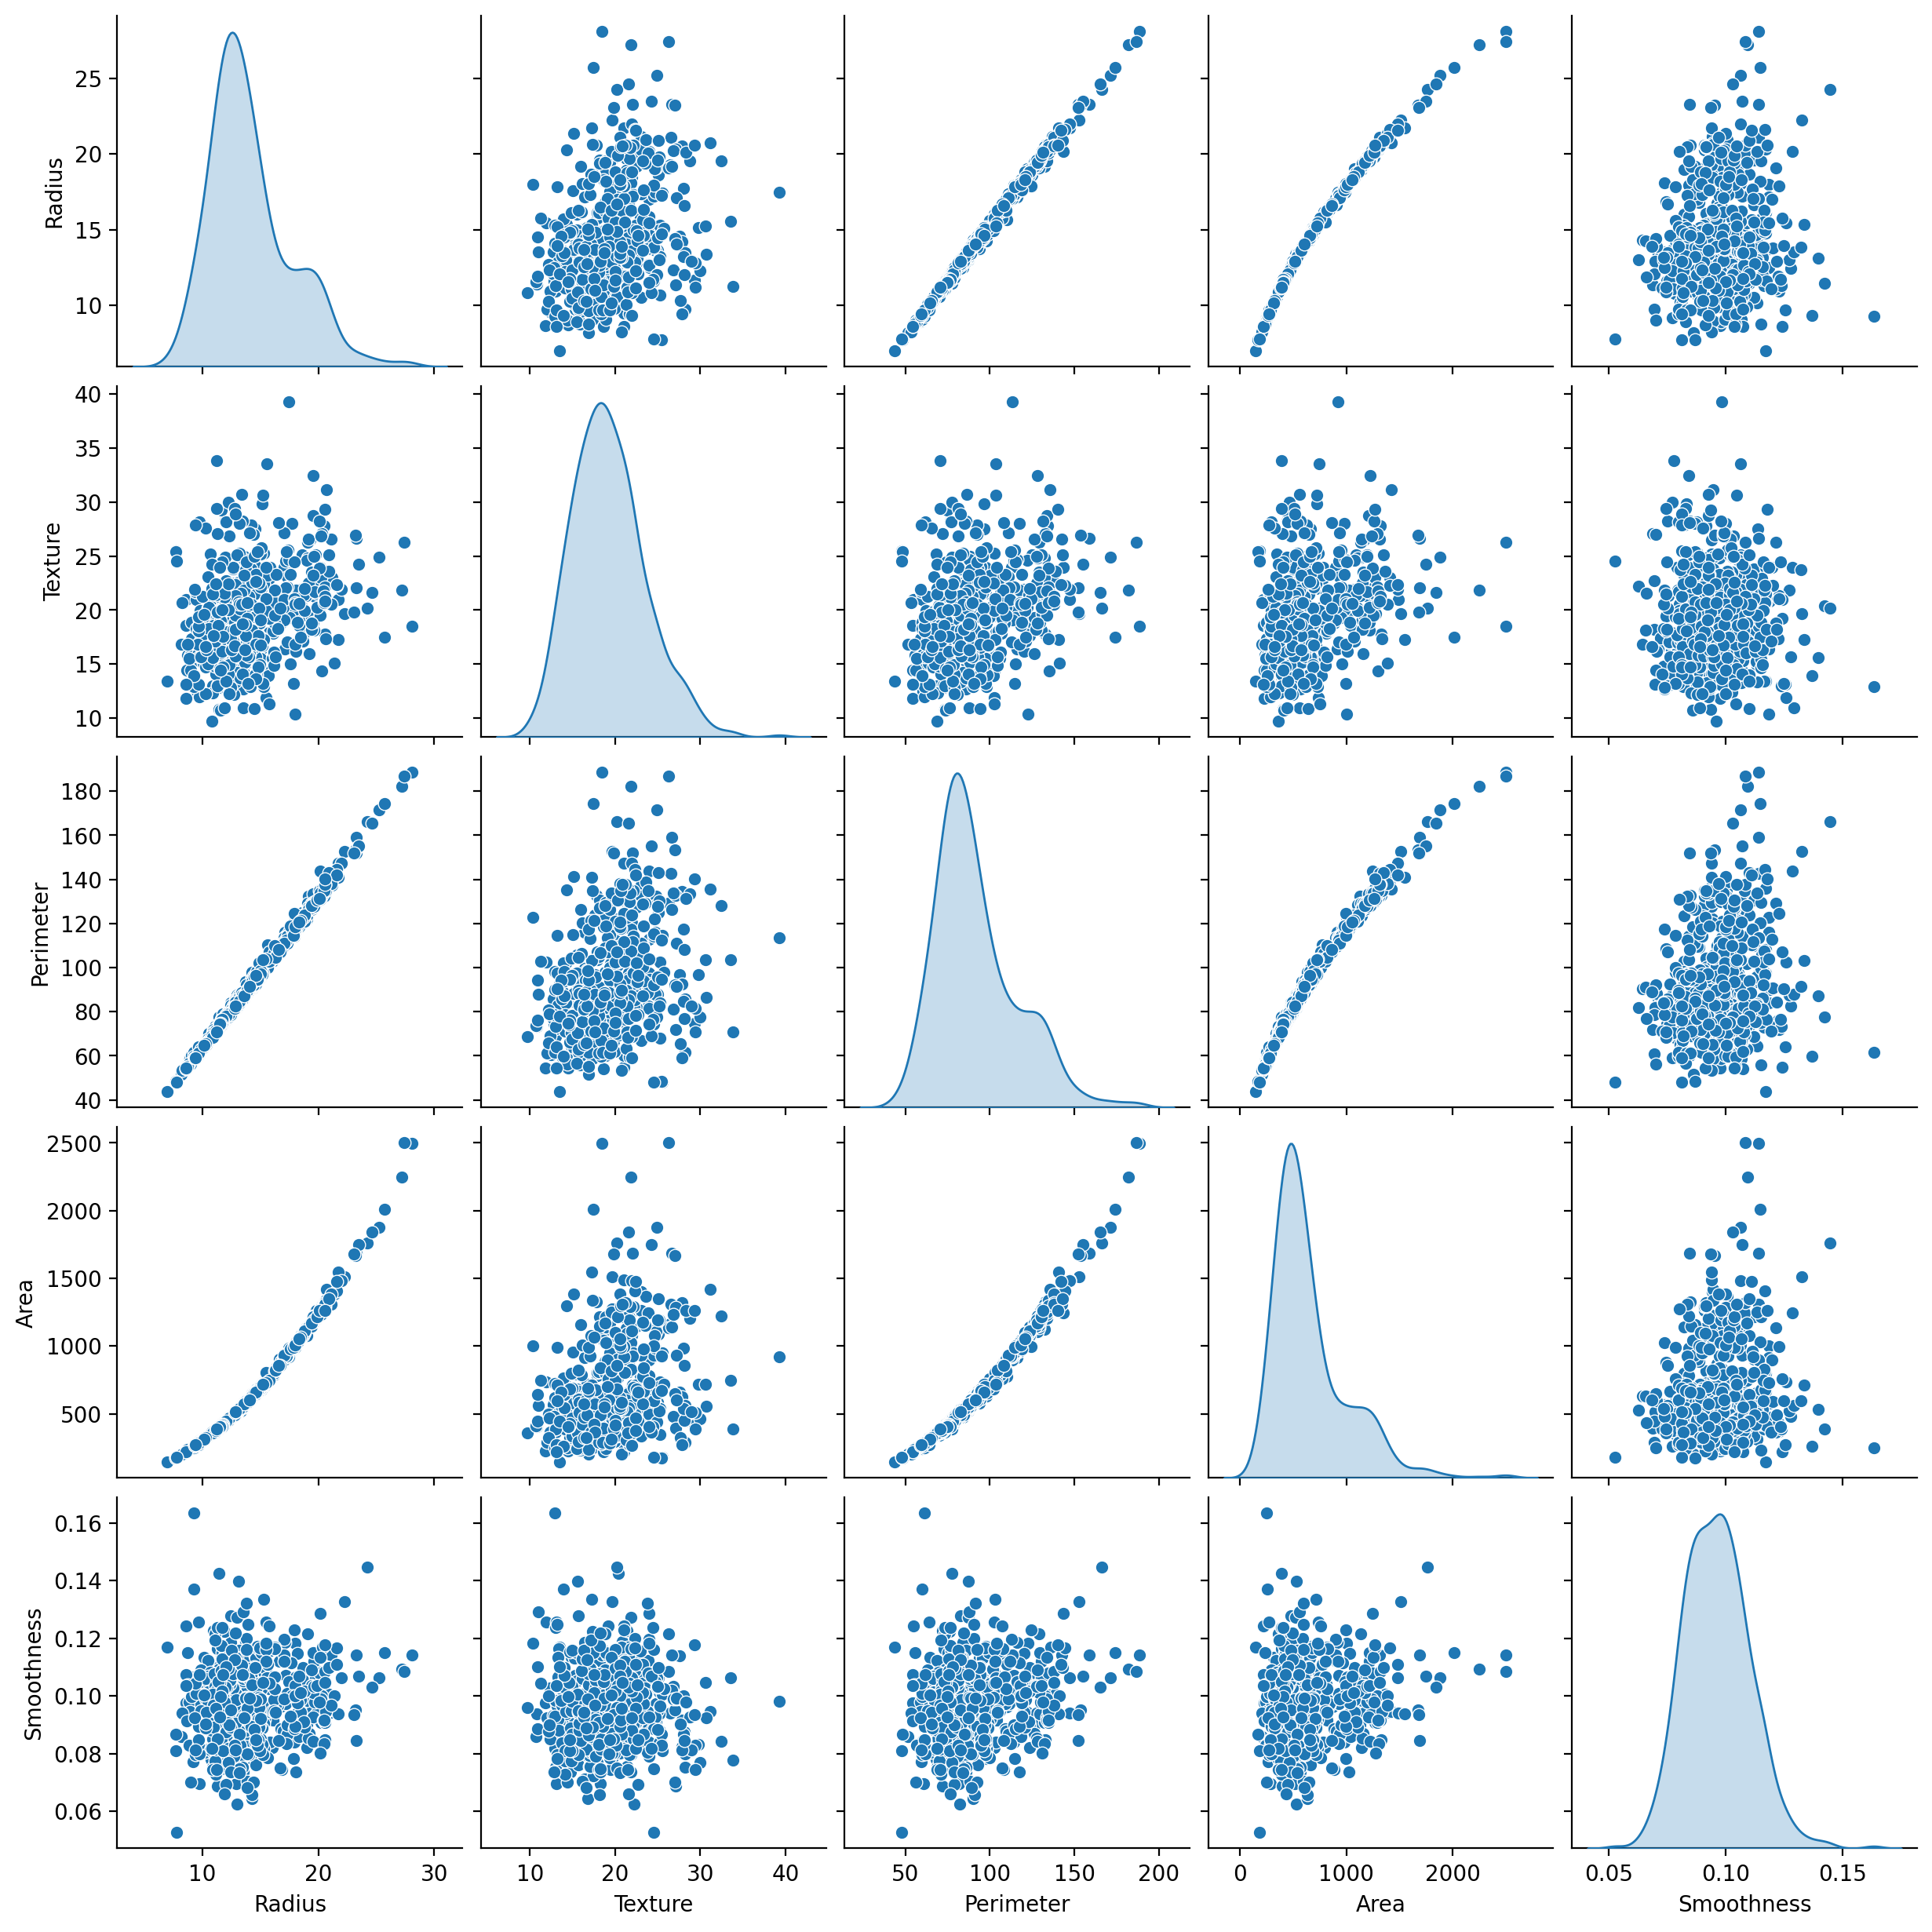

In [12]:
import seaborn as sns

# Let's plot the first 5 features

data_first10 = pd.DataFrame(data[:, :5] , columns=["Radius", "Texture", "Perimeter", "Area", "Smoothness"])
#g = sns.pairplot(data_first10)
g = sns.pairplot(data_first10,diag_kind="kde")


**Question**

Any observations about the pairplot for this dataset?

In [13]:
data_frame = np.zeros([np.shape(data)[0], 6])
data_frame[:,:5] = data[:, :5]
data_first10 = pd.DataFrame(data_frame, columns=["Radius", "Texture", "Perimeter", "Area", "Smoothness", "Label"])
data_frame[:,5] = target.T # appending the targets
g = sns.pairplot(data_first10, hue="Label")

##### 6.2 Split your dataset into training set and testing set

In [14]:
random_seed = 20
unique_targets = np.unique(target, return_counts=True)
print("The unique values are {}, with total amount of {}".format(unique_targets[0], unique_targets[1]))

The unique values are [0 1], with total amount of [212 357]


In [15]:
# Here we consider two types of train/test split.
# The first one offers us a balanced dataset, while the second one offers us an imbalanced dataset.

def train_test_split_with_probablity(X, Y, train_size=250, balanced=True):
  """this function is designed for breast cancer dataset only"""
  zero_mask = (Y == 0)
  one_mask = (Y == 1)

  if balanced:
    train_X = np.concatenate([X[zero_mask][:int(train_size*0.5)], X[one_mask][:int(train_size*0.5)]])
    train_Y = np.concatenate([Y[zero_mask][:int(train_size*0.5)], Y[one_mask][:int(train_size*0.5)]])
    test_X = np.concatenate([X[zero_mask][int(train_size*0.5):], X[one_mask][int(train_size*0.5):]])
    test_Y = np.concatenate([Y[zero_mask][int(train_size*0.5):], Y[one_mask][int(train_size*0.5):]])
  else:
    rate = (1/5)
    train_X = np.concatenate([X[zero_mask][:int(train_size*(1-rate))], X[one_mask][:int(train_size*(rate))]])
    train_Y = np.concatenate([Y[zero_mask][:int(train_size*(1-rate))], Y[one_mask][:int(train_size*(rate))]])
    test_X = np.concatenate([X[zero_mask][int(train_size*(1-rate)):], X[one_mask][int(train_size*(rate)):]])
    test_Y = np.concatenate([Y[zero_mask][int(train_size*(1-rate)):], Y[one_mask][int(train_size*(rate)):]])

  return train_X, train_Y, test_X, test_Y



In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

train_X_bl, train_Y_bl, test_X_bl, test_Y_bl = train_test_split_with_probablity(X_train, y_train, balanced=True)
train_X_imbl, train_Y_imbl, test_X_imbl, test_Y_imbl = train_test_split_with_probablity(X_train, y_train, balanced=False)

print(train_X_bl.shape, train_Y_bl.shape, test_X_bl.shape, test_Y_bl.shape)
print(train_X_imbl.shape, train_Y_imbl.shape, test_X_imbl.shape, test_Y_imbl.shape)

(250, 30) (250,) (176, 30) (176,)
(208, 30) (208,) (218, 30) (218,)


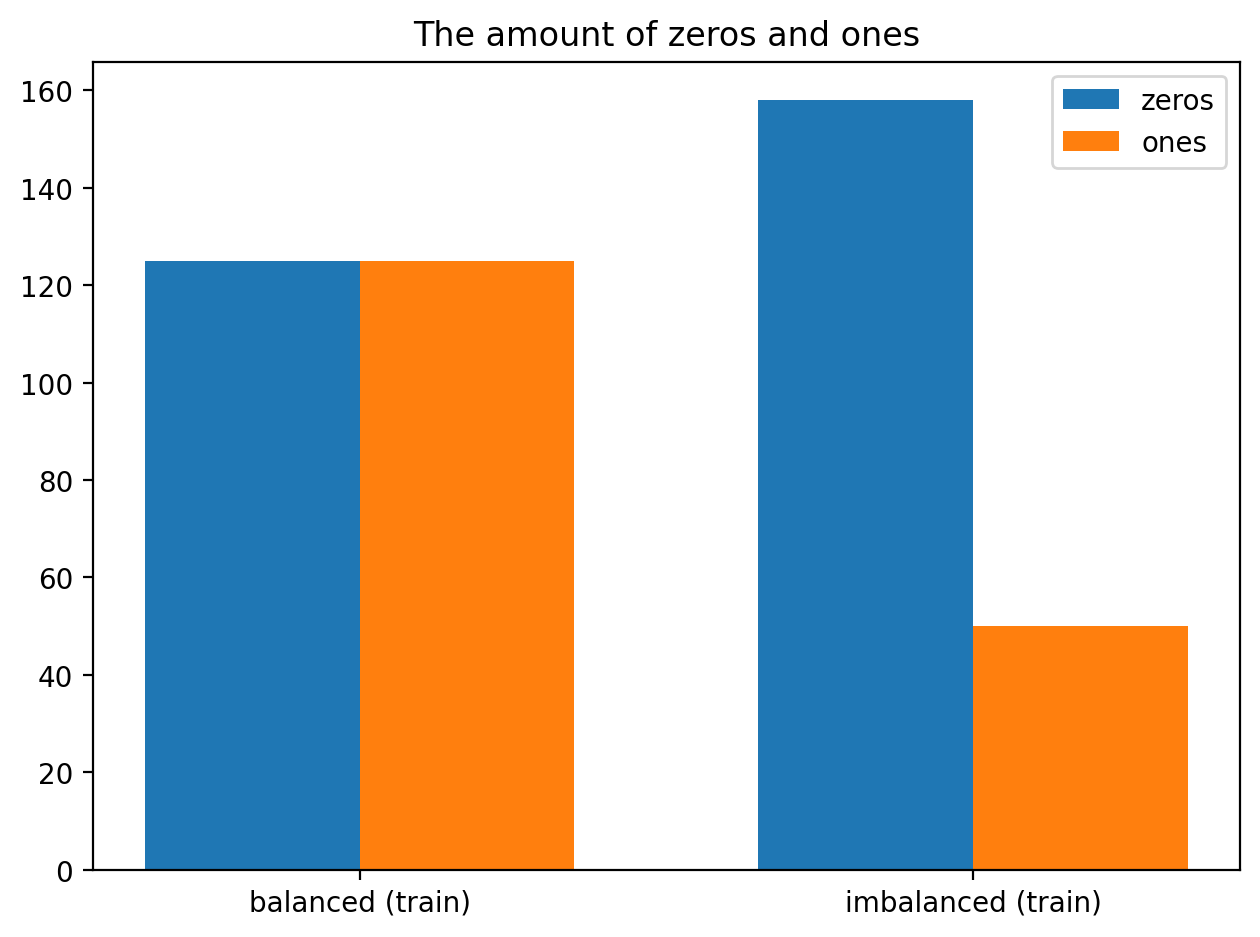

In [17]:
import matplotlib.pyplot as plt

# plot the training set differences
labels = ['balanced (train)', 'imbalanced (train)']
zeros = [train_Y_bl[train_Y_bl == 0].shape[0], train_Y_imbl[train_Y_imbl == 0].shape[0]]
ones = [train_Y_bl[train_Y_bl == 1].shape[0], train_Y_imbl[train_Y_imbl == 1].shape[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zeros, width, label='zeros')
rects2 = ax.bar(x + width/2, ones, width, label='ones')

ax.set_title('The amount of zeros and ones')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [18]:
# plot the testing set differences
labels = ['test set']
zeros = [y_test[y_test == 0].shape[0]]
ones = [y_test[y_test == 1].shape[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zeros, width, label='zeros')
rects2 = ax.bar(x + width/2, ones, width, label='ones')

ax.set_title('Class proportions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

##### 6.3 Train your Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# first, on the balanced dataset
andom_state = random_seed, max_iter=2000)
lr_bl.fit(train_X_bl, train_Y_bl)lr_bl = LogisticRegression(r
print("Accuracy on training set {}".format(lr_bl.score(train_X_bl, train_Y_bl)))
print("Accuracy on testing set {}".format(lr_bl.score(X_test, y_test)))

Accuracy on training set 0.972
Accuracy on testing set 0.972027972027972


In [34]:
# second, on the imbalanced dataset
lr_imbl = LogisticRegression(random_state = random_seed, max_iter=2000)
lr_imbl.fit(train_X_imbl, train_Y_imbl)
print("Accuracy on training set {}".format(lr_imbl.score(train_X_imbl, train_Y_imbl)))
print("Accuracy on testing set {}".format(lr_imbl.score(X_test, y_test)))

Accuracy on training set 0.9615384615384616
Accuracy on testing set 0.965034965034965


The differences in F1 vs. Accuracy - balanced vs. unbalanced cases

In [21]:
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score, precision_score, recall_score

pred_bl = lr_bl.predict(X_test)
pred_imbl = lr_imbl.predict(X_test)

print("Accuracy on balanced training {}, imbalanced training {}.".format(accuracy_score(y_test, pred_bl), accuracy_score(y_test, pred_imbl)))
print("F1 score on balanced training {}, F1 score on imbalanced training {}.".format(f1_score(y_test, pred_bl), f1_score(y_test, pred_imbl)))
print("Precision on balanced training {}, imbalanced training {}.".format(precision_score(y_test, pred_bl), precision_score(y_test, pred_imbl)))
print("Recall on balanced training {}, imbalanced training {}.".format(recall_score(y_test, pred_bl), recall_score(y_test, pred_imbl)))

F1_score_imbalanced = f1_score(y_test, pred_bl)


Accuracy on balanced training 0.972027972027972, imbalanced training 0.965034965034965.
F1 score on balanced training 0.9775280898876404, F1 score on imbalanced training 0.9710982658959537.
Precision on balanced training 0.9775280898876404, imbalanced training 1.0.
Recall on balanced training 0.9775280898876404, imbalanced training 0.9438202247191011.


##### 6.4 Visualize performance

[[52  2]
 [ 2 87]]


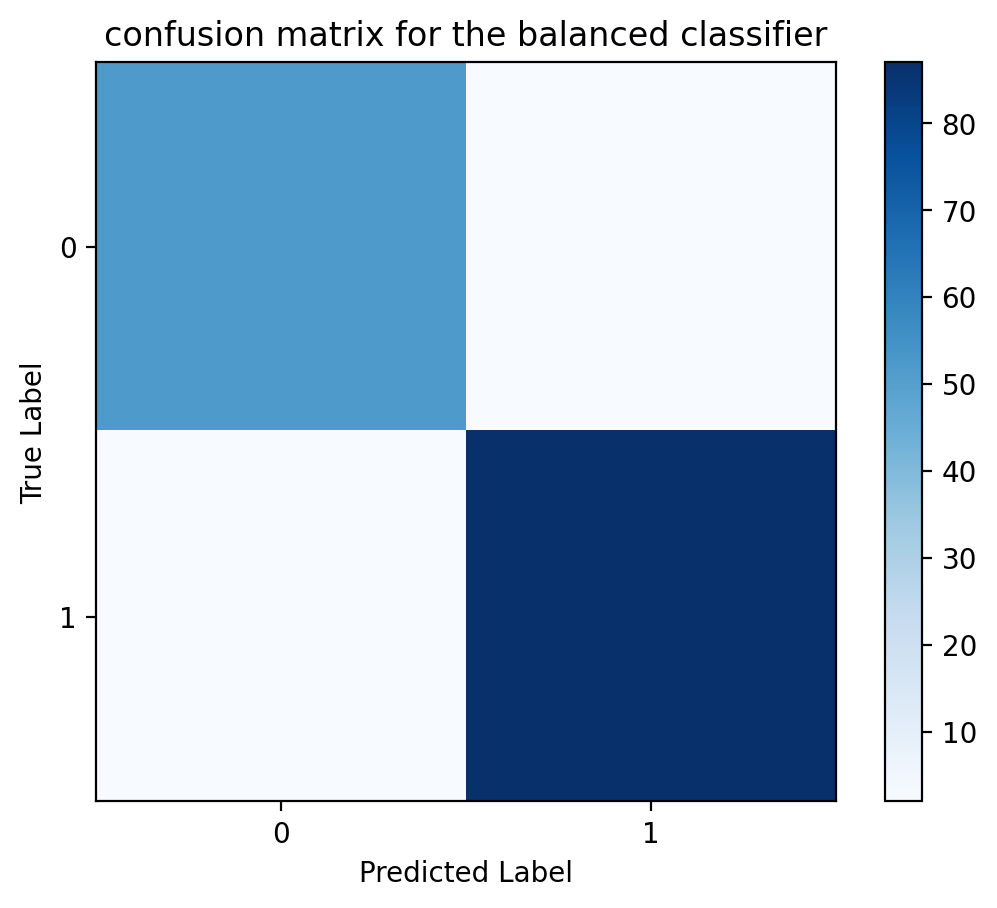

In [22]:
from sklearn.metrics import confusion_matrix

# here we use the full dataset to compare the confusion matrix results
# this is for the balanced classifier

pred_bl = lr_bl.predict(X_test)
bl_report_lr = confusion_matrix(y_test, pred_bl)
print(bl_report_lr)

plt.imshow(bl_report_lr,cmap='Blues')
plt.title("confusion matrix for the balanced classifier")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.colorbar()



In [23]:
pred_imbl = lr_imbl.predict(X_test)
imbl_report_lr = confusion_matrix(y_test, pred_imbl)
print(imbl_report_lr)

plt.imshow(imbl_report_lr,cmap='Blues')
plt.title("confusion matrix for the imbalanced classifier")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.colorbar()
#

[[54  0]
 [ 5 84]]


In [24]:
from sklearn.metrics import roc_curve, auc

y_score = lr_imbl.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
print("Area under the curve (AUC) = ", roc_auc)

Area under the curve (AUC) =  0.9970869746150645


In [25]:
# what about our validation set?
from sklearn.metrics import roc_curve, auc

y_score = lr_imbl.decision_function(test_X_imbl)

fpr, tpr, _ = roc_curve(test_Y_imbl, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
print("Area under the curve (AUC) = ", roc_auc)

Area under the curve (AUC) =  nan


#### 6.5. Class balancing

In [26]:
# change the class weight strategy

lr_imbl_new = LogisticRegression(random_state = random_seed, class_weight="balanced", max_iter=2000)
lr_imbl_new.fit(train_X_imbl, train_Y_imbl)
pred_imbl_new = lr_imbl_new.predict(X_test)
print("F1 score with reweighted training {:2f}; while the old one was {}.".format(f1_score(pred_imbl_new, y_test), f1_score(y_test, pred_imbl)))
print("F1 score for balanced training was {}.".format(f1_score(pred_bl, y_test)))

F1 score with reweighted training 0.977528; while the old one was 0.9710982658959537.
F1 score for balanced training was 0.9775280898876404.


In [27]:
imbl_report_lr = confusion_matrix(y_test, pred_imbl_new, normalize='true')
print(imbl_report_lr)

plt.imshow(imbl_report_lr,cmap='Blues')
plt.title("confusion matrix for the imbalanced classifier")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.colorbar()
#

[[0.96296296 0.03703704]
 [0.02247191 0.97752809]]


#### 7. Augmentations!


SMOTE -- Synthetic minority oversampling technique

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Method for dealing with class imbalance. It works through generating new samples from the minority class through a procedure called *data augmentation*.

To create new synthetic samples:


1.  Select a point from our training set
2.  Find its k-nearest neighbors. In the supervised case, we can select nearby data points from the correct class.
3.  Generate a new sample as a linear combination of our initial sample ($x_{orig}$) and its selected nearest neighbor ($x_{nn}$).
$$x_{new} = (1 - \alpha) x_{orig} + \alpha x_{nn},$$
where $\alpha \in [0, 1]$.


In [37]:
from imblearn.over_sampling import SMOTE, ADASYN
#sm = SMOTE(random_state=42, sampling_strategy=0.5, k_neighbors=5)
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(train_X_imbl, train_Y_imbl)

res_model = LogisticRegression(random_state = 42, max_iter=2000)
res_model.fit(X_res, y_res)

pred_res = res_model.predict(X_test)
print("F1 score after Resampling {:2f}; Reweighted logistic regression {:2f}; while the old one was {}.".format(f1_score(y_test, pred_res), f1_score(lr_imbl_new.predict(X_test), y_test), f1_score(y_test, pred_imbl)))

F1 score after Resampling 0.977528; Reweighted logistic regression 0.977528; while the old one was 0.9710982658959537.


[[52  2]
 [ 2 87]]


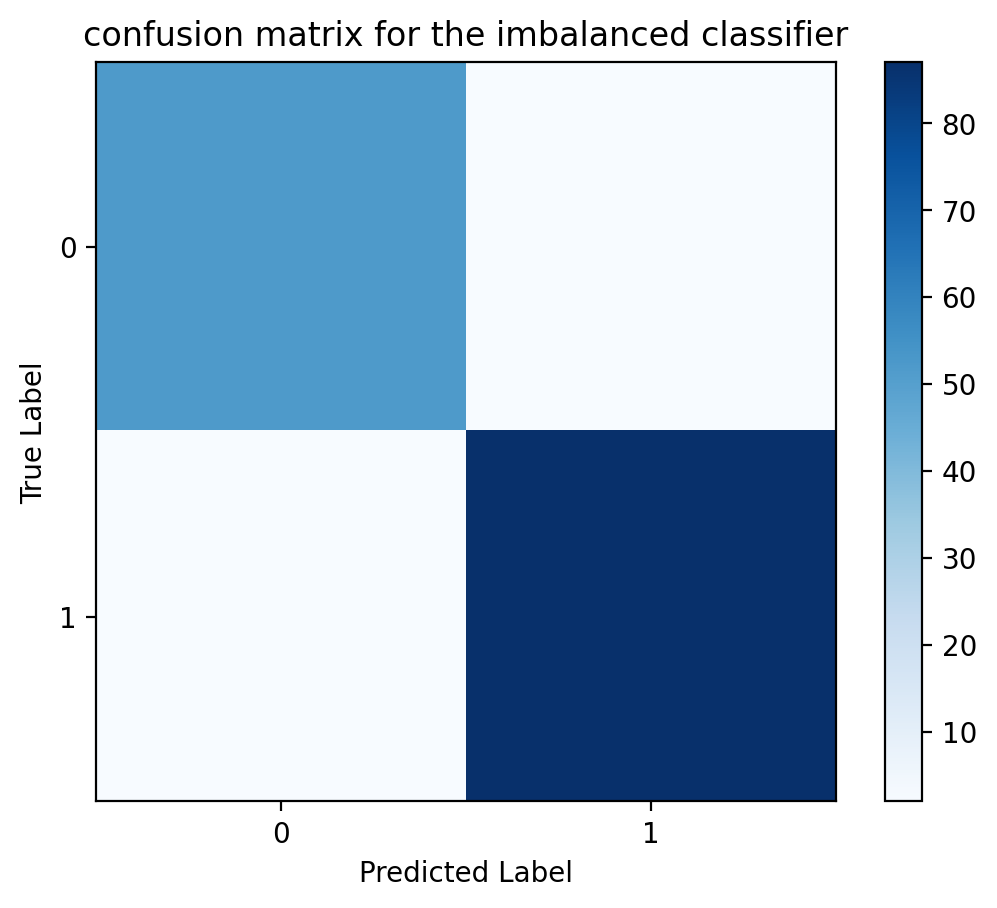

In [38]:
smote_report_lr = confusion_matrix(y_test, pred_res)
print(smote_report_lr)

plt.imshow(smote_report_lr,cmap='Blues')
plt.title("confusion matrix for the imbalanced classifier")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.colorbar()
#

**Challenge:**

1. You have been given a new dataset that has a lot of class imbalance and you need to understand the benefits and assumptions underlying different resampling and rebalancing strategies.

2. Create a set of experiments to explore how different rebalancing approaches work (at least 3 different methods) for different levels of imbalance, and for different amounts of noise, variability, or signal structure.

3. You can use the code below to get started! However, this example dataset has a specific assumption on its structure and noise, so it's important to find other ways to vary the data to understand how the methods will perform in different settings.

4. Include visualizations along with your code to demonstrate your findings.

5. Add a discussion of what your experiments and research on the different resampling and reweighting strategies revealed.

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons # try different datasets and with different amounts of noise

X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=10)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])
ax = X.plot.scatter(
    x="feature 1",
    y="feature 2",
    c=y,
    colormap="viridis",
    colorbar=False,
)
sns.despine(ax=ax, offset=10)
plt.tight_layout()


In [32]:
from collections import Counter


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}


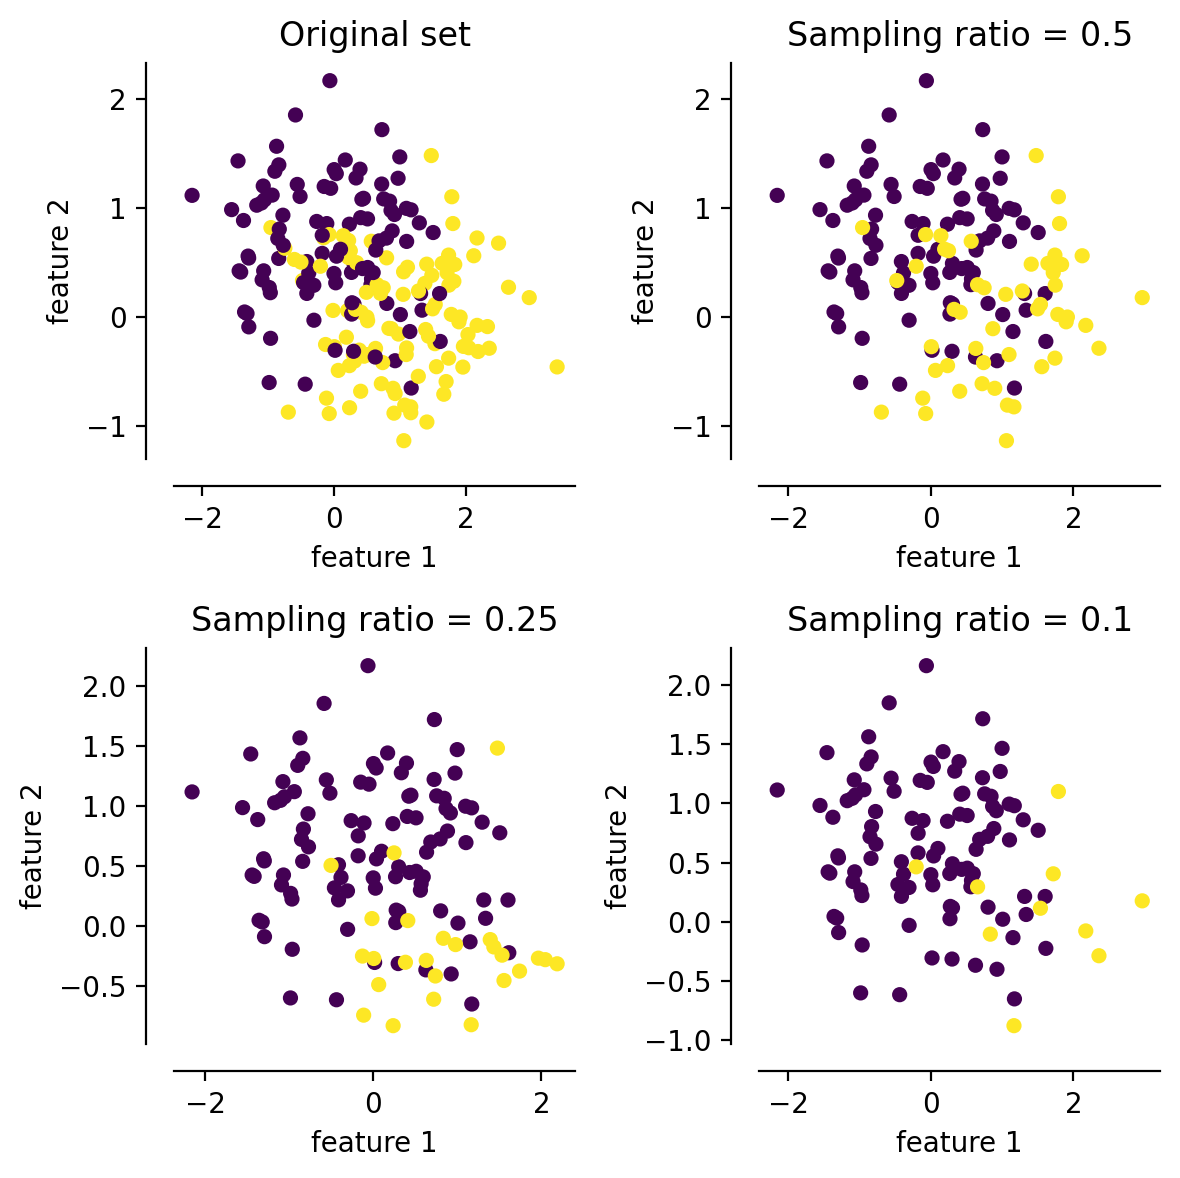

In [33]:
from imblearn.datasets import make_imbalance

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

X.plot.scatter(
    x="feature 1",
    y="feature 2",
    c=y,
    ax=axs[0, 0],
    colormap="viridis",
    colorbar=False,
)
axs[0, 0].set_title("Original set")
sns.despine(ax=axs[0, 0], offset=10)

multipliers = [0.5, 0.25, 0.1]
for ax, multiplier in zip(axs.ravel()[1:], multipliers):
    X_resampled, y_resampled = make_imbalance(
        X,
        y,
        sampling_strategy=ratio_func,
        **{"multiplier": multiplier, "minority_class": 1},
    )
    X_resampled.plot.scatter(
        x="feature 1",
        y="feature 2",
        c=y_resampled,
        ax=ax,
        colormap="viridis",
        colorbar=False,
    )
    ax.set_title(f"Sampling ratio = {multiplier}")
    sns.despine(ax=ax, offset=10)

plt.tight_layout()
plt.show()

In [ ]:
# add your code below




**Discussion:**

> Add your discussion here.

#### Summary and Resources


Oversampling approaches:
https://imbalanced-learn.org/stable/references/over_sampling.html